# Before we start. 

Before you start working on today's class, take 10 minutes to fill in the mid-term feedback form on DTU Learn: 
[Week 5 - Mid-term Feedback Form](https://learn.inside.dtu.dk/d2l/lms/survey/user/surveys_list.d2l?ou=187754)

Your feedback is super crucial for me. It helps me get a feel for how things are going and what I can do to make the class better. So, please, please, please, make sure to fill it!!


# Overview

This week we'll talk about some of the charachteristics of real-world social networks. The structure is the following: 

* __Part 1: Introduction to heavy tailed distributions.__ We will begin with a brief overview of heavy tailed distributions, emphasizing their importance in social systems. Understanding these distributions is crucial as they frequently emerge in the analysis of social networks, a theme we will revisit in subsequent exercises.

* __Part 2: Properties real-world social networks.__ We will delve into some of features that charachterize social networks. 

* __Part 3: Analyzing the Network of Computational Social Scientists__ We will turn our attention to the specific network of Computational Social Scientists. Here, the focus will be on investigating and understanding the properties of this network based on the concepts learned in the previous sections.


> *Reading*: Read [Chapter 3 of the Network Science book.](http://networksciencebook.com/chapter/3). The most important sections are 3.1 to 3.4 and 3.8 to 3.10, so focus on that.

# Part 1 : Heavy tailed distributions

When it comes to real-world data, it is very common to observe distributions that are so-called "Heavy tailed". In this section, we will explore this concept a bit more in detail. 
We will start by watching a video-lecure by me. 

> *Video Lecture*: [Heavy tailed distributions](https://www.youtube.com/watch?v=S2OZBTKx8_E)


In this exercise, we'll delve into the impact of heavy-tailed distributions on the reliability of sample averages as estimators for the population mean, a concept discussed in our lecture.

This idea is rooted in [the Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers), which posits that the average of a sufficiently large sample from a distribution with a finite expected value will converge to the population mean. 
However, this principle can fail with heavy-tailed distributions where the expected value may not be finite or the convergence of the sample mean to the population mean can be slow due to high variance.


>__Exercise 1: Law of large numbers__. 
> 
> 1. Sample __N=10,000__ data points from a [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution) with parameters $\mu = 0 $ and $\sigma = 4$, using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function. Store your data in a numpy array $\mathbf{X}$. 
> 2. Create a figure. 
>    - Plot the distribution of the data in $\mathbf{X}$. 
> 3. Compute the cumulative average of $\mathbf{X}$ (you achieve this by computing $average(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$  ). Store the result in an array. 
> 4. In a similar way, compute the cumulative standard error of $\mathbf{X}$. __Note__: the standard error of a sample is defined as $ \sigma_{M} = \frac{\sigma}{\sqrt(n)} $, where $\sigma$ is the sample standard deviation and $n$ is the sample size. Store the result in an array. 
> 5. Compute the values of the distribution mean and median using the formulas you can find on the [Wikipedia page of the Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution)  
> 6. Create a figure. 
>     - Plot the cumulative average computed in point 3. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>     - Add errorbars to each point in the graph with width equal to the standard error of the mean (the one you computed in point 4). 
>     - Add a horizontal line corresponding to the distribution mean (the one you found in point 5).
> 7.  Compute the cumulative median of $\mathbf{X}$ (you achieve this by computing $median(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$). Store the result in an array. 
> 8. Create a figure. 
>    - Plot the cumulative median computed in point 7. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>    - Add a horizontal line corresponding to the distribution median (the one you found in point 5).
>    - _Optional:_ Add errorbars to your median line graph, with width equal to the standard error of the median. You can compute the standard error of the median [via bootstrapping](https://online.stat.psu.edu/stat500/book/export/html/619). 
> 9. Now sample __N = 10,000__ data points from a [Pareto Distribution](https://en.wikipedia.org/wiki/Pareto_distribution) with parameters $x_m=1$ and $\alpha=0.5$ using the [`np.random.pareto()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html) function, and store it in a numpy array. (_Optional:_ Write yourself the function to sample from a Pareto distribution using the [_Inverse Transform Sampling method_](https://en.wikipedia.org/wiki/Inverse_transform_sampling))
> 10. Repeat points 2 to 8 for the Pareto Distribution sample computed in point 9. 
> 11. Now, consider your _paper_ dataset (the one you created in Week 3). First, compute the mean and median number of citations for this population. Then, extract a random sample of __N=10,000__ papers.  
> 12. Repeat points 2,3,4,6,7 and 8 above for the paper citation sample prepared in point 11. 
13. Reflect on the following questions based on your analysis (__Hint__: I suggest you plot the graphs above multiple times for different random samples, to get a better understanding of what is going on): 
    - Compare the behavior of the cumulative average for Gaussian and Pareto distributions. What differences do you notice, and how do they align with your expectations?
    - Assess the cumulative median against the cumulative average across the two distributions. What insights can you gather about the utility of mean versus median in these contexts?
    - Based on your citation count data analysis, what observations can you make? What implications do these observations have?
    - Conclude with your key takeaways from this exercise.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#exercise 1.1
np.random.seed(1000)
mu, sigma = 0, 4 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
print(np.array(s))


[-3.21783321  1.28372619 -0.10193152 ... -0.25737965  2.02281254
 -6.52377685]


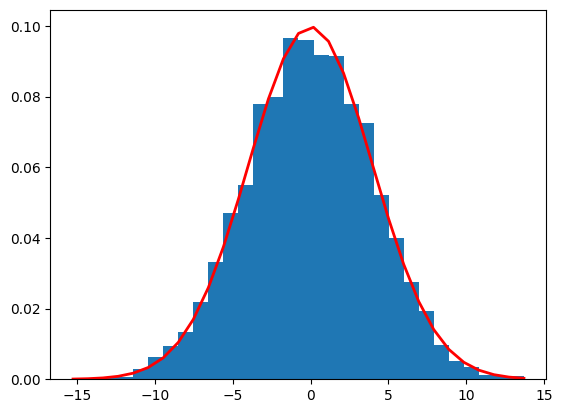

In [5]:
#exercise 1.2 

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [6]:
#exercise 1.3 

def cumu_avg(distribution):
    cumu_averages = []
    cumu_sum = 0
    
    for i in range(len(distribution)):
        cumu_sum += distribution[i]
        cumu_average = cumu_sum / (i + 1)
        cumu_averages.append(cumu_average)

    cumu_averages = np.array(cumu_averages)
    return cumu_averages


print(cumu_avg(s))



[-3.21783321 -0.96705351 -0.67867952 ... -0.04704089 -0.04683388
 -0.04748158]


In [7]:
#exercise 1.4 
def compute_cumulative_standard_error(distribution):
    cumulative_standard_errors = np.zeros(len(distribution))  # Initialize array to store cumulative standard errors

    
    
    for i in range(len(distribution)):
        sample = distribution[:i+1]  # Extract sample up to index i
        N = len(sample)
        sigma = np.std(sample) 
        cumulative_standard_errors[i] = sigma / np.sqrt(N)  # Compute cumulative standard error
        
    return cumulative_standard_errors

cumulative_standard_errors = compute_cumulative_standard_error(s)
print("Cumulative standard errors:", cumulative_standard_errors)

Cumulative standard errors: [0.         1.59154159 1.08683924 ... 0.04035244 0.04034893 0.0403501 ]


In [8]:
#exercise 1.5 

mean = np.mean(s)
median = np.median(s)

print("Mean of distribution:", mean)
print("Median of distribution:", median)

Mean of distribution: -0.047481578233762346
Median of distribution: -0.03569425674636109


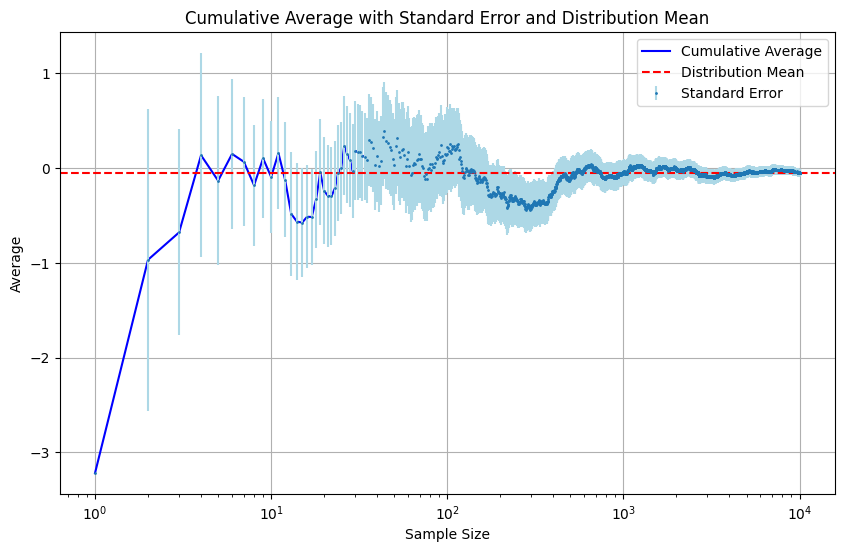

In [9]:
#exercise 1.6

ca = cumu_avg(s)
cse = compute_cumulative_standard_error(s)
mean = np.mean(s)
N = len(s)

# Create figure
plt.figure(figsize=(10, 6))

# Plot cumulative average
plt.plot(range(1, N + 1), ca, color = "blue", label='Cumulative Average')

# Add error bars with width equal to the standard error of the mean
plt.errorbar(range(1, N + 1), ca, yerr=cse, fmt='o', ecolor ="lightblue", label='Standard Error',markersize =1)

# Plot horizontal line for distribution mean
plt.axhline(y=mean, color='r', linestyle='--', label='Distribution Mean')

# Labeling and styling
plt.xlabel('Sample Size')
plt.ylabel('Average')
plt.xscale("log")
plt.title('Cumulative Average with Standard Error and Distribution Mean')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [10]:
#exercise 1.7 

def cumu_median(distribution):
    cumu_median = []
    
    for i in range(len(distribution)):
        cumu_median.append(np.median(distribution[:i+1]))


    cumu_m = np.array(cumu_median)
    return cumu_m


print(cumu_median(s))

[-3.21783321 -0.96705351 -0.10193152 ... -0.03569426 -0.03508806
 -0.03569426]


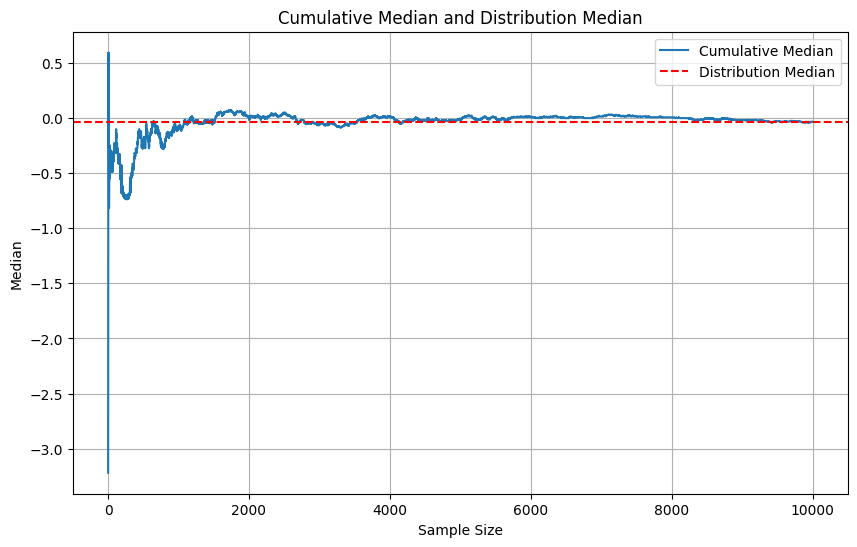

In [11]:
#exercise 1.8
cumulative_medians = cumu_median(s)
median_value = np.median(s)
N = len(s)

# Create figure
plt.figure(figsize=(10, 6))

# Plot cumulative median
plt.plot(range(1, N + 1), cumulative_medians, label='Cumulative Median')

# Plot horizontal line for distribution median
plt.axhline(y=median_value, color='r', linestyle='--', label='Distribution Median')

# Labeling and styling
plt.xlabel('Sample Size')
plt.ylabel('Median')
plt.title('Cumulative Median and Distribution Median')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [12]:
#exercise 1.9 
a, m = 0.5, 1.  # shape and mode
N = 10000
p = (np.random.pareto(a, N) + 1) * m


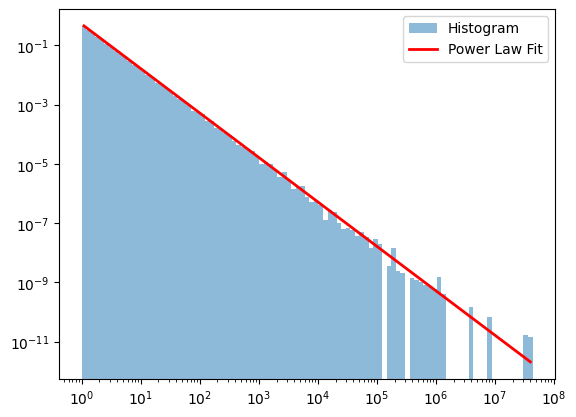

In [13]:
#exercise 1.10.1

import matplotlib.pyplot as plt
# Calculate histogram with logarithmic bins
hist, bins = np.histogram(p, bins=np.logspace(np.log10(min(p)), np.log10(max(p)), 100), density=True)

# Calculate the centers of the bins
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit a power law distribution
fit = a * m**a / bin_centers**(a+1)

# Plot histogram
plt.hist(p, bins=bins, density=True, alpha=0.5, label='Histogram')

# Plot the fit
plt.plot(bin_centers, max(hist) * fit / max(fit), linewidth=2, color='r', label='Power Law Fit')

plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.show()

In [14]:
#exercise 1.10.2 

print("Cumulative average:", cumu_avg(p))
print("Cumulative std. error:", compute_cumulative_standard_error(p))
print("Mean:", np.mean(p))
print("Median:", np.median(p))

Cumulative average: [  255.28836671   281.92025356   190.80497426 ... 10102.81448766
 10101.80659232 10100.80572771]
Cumulative std. error: [   0.           18.83158778   75.44717028 ... 5479.22977458 5478.6818895
 5478.13411273]
Mean: 10100.80572771026
Median: 3.9295811135615915


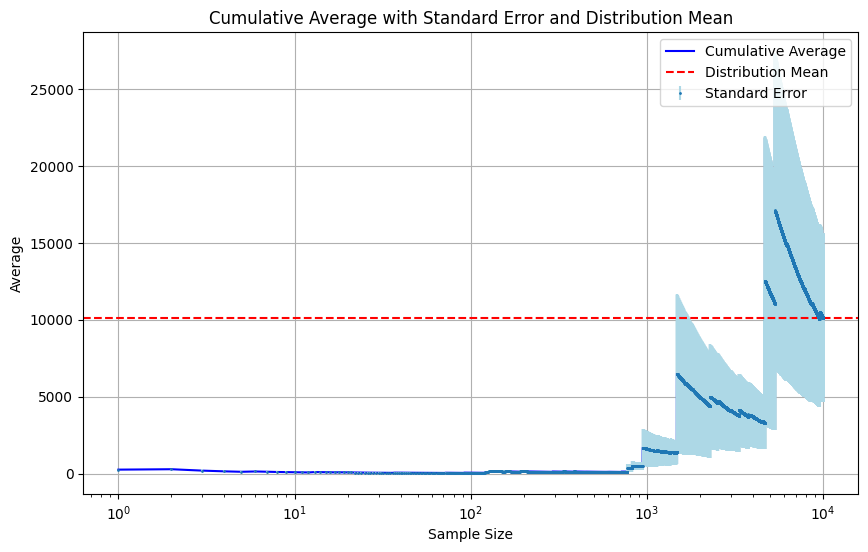

In [15]:
#exercise 1.10.3
ca = cumu_avg(p)
cse = compute_cumulative_standard_error(p)
mean = np.mean(p)
N = len(p)

# Create figure
plt.figure(figsize=(10, 6))

# Plot cumulative average
plt.plot(range(1, N + 1), ca, color = "blue", label='Cumulative Average')

# Add error bars with width equal to the standard error of the mean
plt.errorbar(range(1, N + 1), ca, yerr=cse, fmt='o', ecolor ="lightblue", label='Standard Error',markersize =1)

# Plot horizontal line for distribution mean
plt.axhline(y=mean, color='r', linestyle='--', label='Distribution Mean')

# Labeling and styling
plt.xlabel('Sample Size')
plt.ylabel('Average')
plt.xscale("log")
plt.title('Cumulative Average with Standard Error and Distribution Mean')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

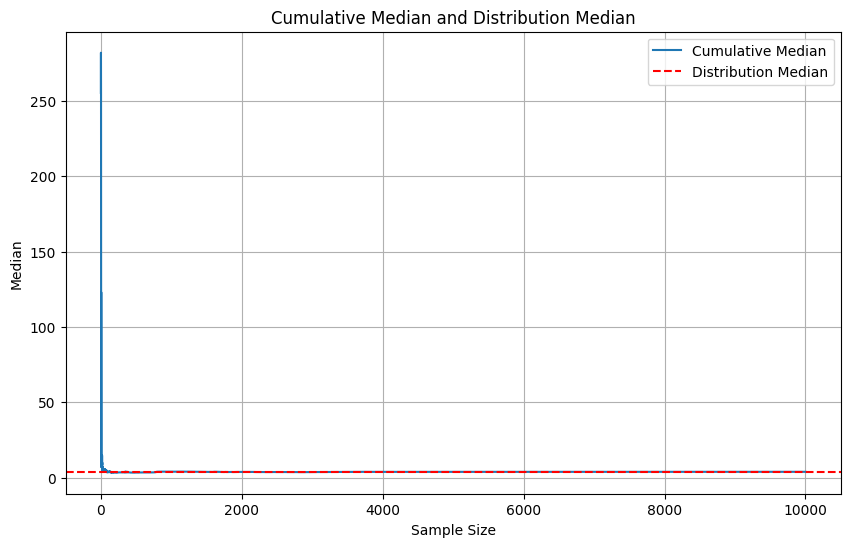

In [16]:
#exercise 1.8
cumulative_medians = cumu_median(p)
median_value = np.median(p)
N = len(p)

# Create figure
plt.figure(figsize=(10, 6))

# Plot cumulative median
plt.plot(range(1, N + 1), cumulative_medians, label='Cumulative Median')

# Plot horizontal line for distribution median
plt.axhline(y=median_value, color='r', linestyle='--', label='Distribution Median')

# Labeling and styling
plt.xlabel('Sample Size')
plt.ylabel('Median')
plt.title('Cumulative Median and Distribution Median')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [17]:
#exercise 1.11 
import pandas as pd 

papers_data = pd.read_csv("/Users/livdreyerjohansen/Downloads/final_papers_dataset.csv")
#print(papers_data)

no_cited = papers_data["cited_by_count"]
print("Mean:", np.mean(no_cited))
print("Median:", np.median(no_cited))

sampled_df = papers_data.sample(n=10000, random_state=42)

cit_sample = sampled_df["cited_by_count"]

#print(cit_sample)

cit_sample = cit_sample.values

print("Cumulative average:", cumu_avg(cit_sample))
print("Cumulative std. error:", compute_cumulative_standard_error(cit_sample))
print("Mean:", np.mean(cit_sample))
print("Median:", np.median(cit_sample))

/var/folders/nw/yrny75552dl0y5w78q4z6cdm0000gn/T/ipykernel_40356/3259524836.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Mean: 99.38891676103378
Median: 38.0
Cumulative average: [173.         104.          75.         ...  94.39757952  94.38983898
  94.3868    ]
Cumulative std. error: [ 0.         48.7903679  40.23265672 ...  2.47311509  2.47287987
  2.47263444]
Mean: 94.3868
Median: 37.0


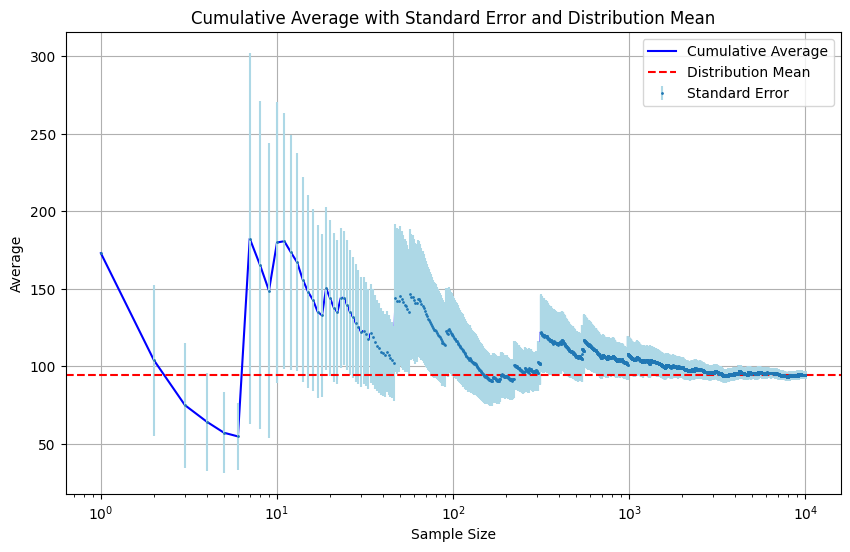

In [18]:
N = 10000
# Create figure
plt.figure(figsize=(10, 6))

# Plot cumulative average
plt.plot(range(1, N + 1), cumu_avg(cit_sample), color = "blue", label='Cumulative Average')

# Add error bars with width equal to the standard error of the mean
plt.errorbar(range(1, N + 1), cumu_avg(cit_sample), yerr=compute_cumulative_standard_error(cit_sample), fmt='o', ecolor ="lightblue", label='Standard Error',markersize =1)

# Plot horizontal line for distribution mean
plt.axhline(y=np.mean(cit_sample), color='r', linestyle='--', label='Distribution Mean')

# Labeling and styling
plt.xlabel('Sample Size')
plt.ylabel('Average')
plt.xscale("log")
plt.title('Cumulative Average with Standard Error and Distribution Mean')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Part 2 : Empirical properties of real-world social networks

Researchers in Computational Social Science have widely studied the properties of real-world social networks. The very cool thing they found is that many widely different social networks (from face-to-face interactions among classmates, to the Facebook network, to collaboration networks among scientists or actors, etc) present some commonalities. Researchers sometimes refer to those as 'Universalities'.
In the video-lecture below, I will introduce _some_ of the things we know to be true for most real-world social networks. 

>> **_Video Lecture_**. Start by watching the ["Properties of empirical social networks"](https://youtu.be/jHdnehLku54). 


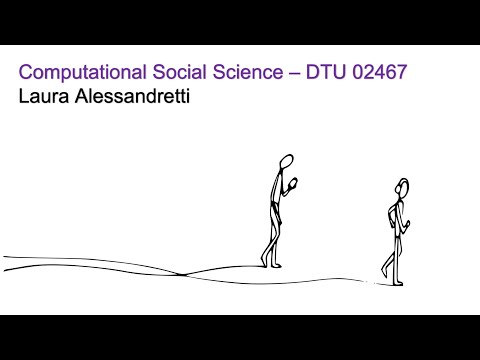

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo("jHdnehLku54",width=800, height=450)

> __*Exercise 2:* Did you really read the text? Answer the following questions (no calculations needed) in your Jupyter notebook.__
>
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of ⟨k⟩.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

# Part 3: Properties of the real-world network of Computational Social Scientists


> __Exercise 3: Analyzing Networks through a Random Model__
>

>
> 2.1 _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.   
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 
>
> * Answer the following questions:  
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
>
>   
> 2.2 _Degree Distribution_: This section focuses on analyzing the degree distribution of both the actual Computational Social Scientists network and its random counterpart.
> * Compute the distribution of degree for the random network using the numpy function ``np.histogram``. Choose bins, and normalization strategies appropriately. **Hint:** Revisit the content from Week 3, Part 3 of the lectures.  
> * Compute the distribution of degree for the Computational Social Scientists network using the numpy function ``np.histogram``. Also here, choose bins and normalization strategies wisely, based on the recommendations from previous lectures.
> * Plot both degree distributions on the same figure using line plots, ensuring the x and y axes are scaled in a way that allows for comparison between the two distributions.
> * Add two vertical lines showing the average degree for the random and the real network. 
> * Answer the following questions: 
>    - Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.
>    - What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties?
>
>
>   
>
> 2.3 _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.
> * Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:
>    - Utilize [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.
>    - Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).
> * Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html). 
> * Perform the same calculation for the giant component of the random network you constructed in exercise 2.1.
> * Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.
>   - Why do you think I asked you to consider the giant component only? 
>   - Why do you think I asked you to consider unweighted edges? 
>   - Does the Computational Social Scientists network exhibit the small-world phenomenon? 



# Exercise 3

>
> 2.1 _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.   
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 
>
> * Answer the following questions:  
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
>

Using the formula 3.2 from Network Science we can isolate p and find the probability p.

\<L\> = p*(N(N-1)/2)

Isolating p, we get: 

p = 2*L/(N*(N - 1))

In [20]:
N = 14100
L = 49431

p = (2*L)/(N*(N-1))

print("Probability p:", p)

#average degree, formula also from book (3.3)

k = p*(N-1)

print("Average degree k:", k)

Probability p: 0.0004973040188454591
Average degree k: 7.011489361702128


In [21]:
import networkx as nx
import numpy as np


def generate_random_network(node_count, p, seed=None):
    # Set random seed if provided
    if seed is not None:
        np.random.seed(seed)
    # Create an empty graph
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(node_count))

    # Link nodes with probability p
    for i in range(node_count):
        for j in range(i+1, node_count):
            if np.random.uniform() < p:
                G.add_edge(i, j)

    return G

node_count =  N
p =  p

# Generate random network
#random_network = generate_random_network(node_count, p)

def random_net(N,p):
    return nx.fast_gnp_random_graph(N,p,seed=42,directed=False)

#random_network = random_net(N,p)
random_network_1 = generate_random_network(N, p,seed=42)
# Print basic information about the generated network

print("Number of random nodes:", random_network_1.number_of_nodes())
print("Number of random edges:", random_network_1.number_of_edges())


Number of random nodes: 14100
Number of random edges: 49567


In [22]:


def visualize_network(G):
    # Draw the network
    nx.draw(G, with_labels=False, node_color='skyblue', node_size=10, edge_color='gray',width=1.0)

    # Show the plot
    plt.title("Random Network Visualization")
    plt.show()

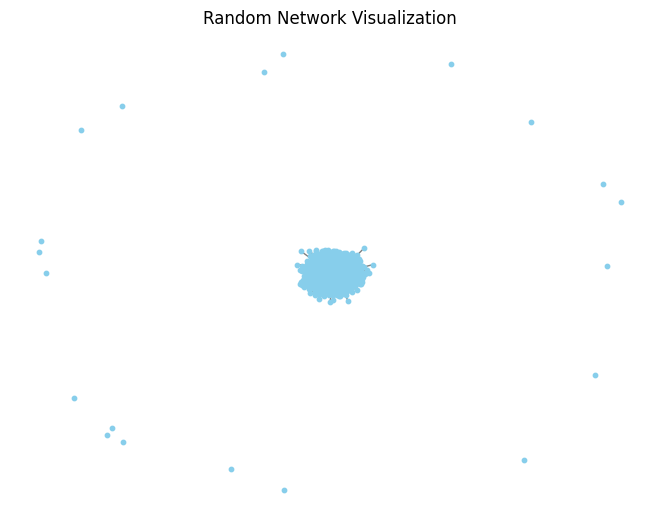

In [23]:
visualize_network(random_network_1)

In [24]:
import netwulf as nu

In [25]:
a, b = nu.visualize(random_network_1)

(<Figure size 480x480 with 1 Axes>, <Axes: >)

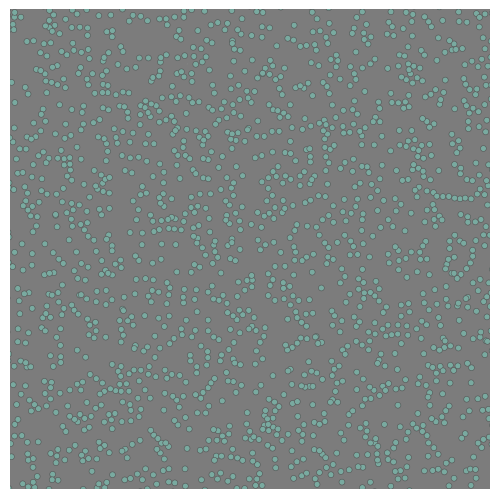

In [26]:
nu.draw_netwulf(a)

# Degree exercises

Compute the distribution of degree for the random network using the numpy function np.histogram. Choose bins, and normalization strategies appropriately. Hint: Revisit the content from Week 3, Part 3 of the lectures.

In [33]:

G_random = random_network_1

N_random = G_random.number_of_nodes()

#find the maximum degrees that a node has 
degree_dict = dict(G_random.degree())
max_degree_node = max(degree_dict, key=degree_dict.get)

#create dict to "count" number of nodes with degrees between 0 and maximum number of degrees
random_graph_dict = {i: 0 for i in range(degree_dict[max_degree_node]+1)}

#add count to dict 
for node in range(0, N_random):
    degree_value = G_random.degree[node]
    random_graph_dict[degree_value] += 1

#find p_k for each node (2.7 in networks book)
#for key in random_graph_dict:
    #random_graph_dict[key] = random_graph_dict[key]/N_random

print(random_graph_dict)
print("Should sum to 1:", sum(random_graph_dict.values()))



{0: 20, 1: 81, 2: 326, 3: 730, 4: 1228, 5: 1811, 6: 2082, 7: 2098, 8: 1793, 9: 1497, 10: 1025, 11: 661, 12: 361, 13: 192, 14: 102, 15: 51, 16: 17, 17: 18, 18: 5, 19: 1, 20: 1}
Should sum to 1: 14100


In [78]:

G_random = random_network_1

N_random = G_random.number_of_nodes()

#find the maximum degrees that a node has 
degree_dict = dict(G_random.degree())
max_degree_node = max(degree_dict, key=degree_dict.get)

#create dict to "count" number of nodes with degrees between 0 and maximum number of degrees
random_graph_dict = {i: 0 for i in range(degree_dict[max_degree_node]+1)}

#add count to dict 
for node in range(0, N_random):
    degree_value = G_random.degree[node]
    random_graph_dict[degree_value] += 1

#find p_k for each node (2.7 in networks book)
for key in random_graph_dict:
    random_graph_dict[key] = random_graph_dict[key]/N_random

print(random_graph_dict)
print("Should sum to 1:", sum(random_graph_dict.values()))

{0: 0.0014184397163120568, 1: 0.00574468085106383, 2: 0.023120567375886525, 3: 0.05177304964539007, 4: 0.08709219858156028, 5: 0.12843971631205675, 6: 0.14765957446808511, 7: 0.14879432624113476, 8: 0.1271631205673759, 9: 0.10617021276595745, 10: 0.0726950354609929, 11: 0.046879432624113475, 12: 0.025602836879432624, 13: 0.013617021276595745, 14: 0.00723404255319149, 15: 0.003617021276595745, 16: 0.0012056737588652482, 17: 0.001276595744680851, 18: 0.0003546099290780142, 19: 7.092198581560284e-05, 20: 7.092198581560284e-05}
Should sum to 1: 1.0


Text(0, 0.5, 'Probability Density')

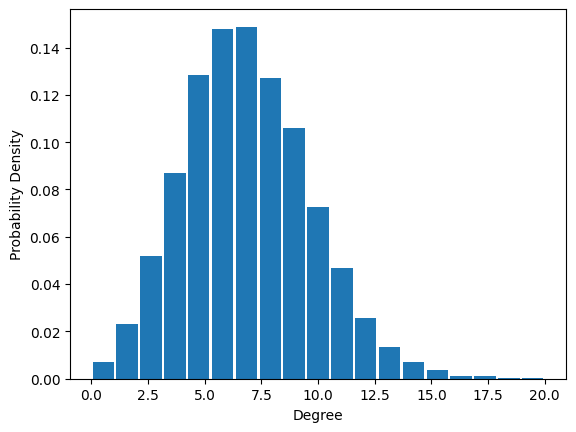

In [79]:
# Convert dictionary keys to array for data points
degrees = np.array(list(random_graph_dict.keys()))

# Convert dictionary values to array for frequencies
frequencies = np.array(list(random_graph_dict.values()))

# Compute histogram
bins = np.linspace(min(degrees),max(degrees),20)
hist, edges = np.histogram(degrees,bins=bins,weights=frequencies,density=False)
width = bins[1]-bins[0]

#hist, bins = np.histogram(degrees, bins=np.arange(np.max(degrees) + 2), weights=frequencies)

x = (edges[1:]+edges[:-1])/2
# Plot the histogram
fig,ax = plt.subplots()
ax.bar(x,hist,width=width*0.9)
ax.set_xlabel("Degree")
ax.set_ylabel("Probability Density")



#plt.bar(x, hist, width=0.9, align='center')

# Add labels and title
#plt.xlabel('Degree')
#plt.ylabel('Probability')
#plt.title('Degree Distribution')

Compute the distribution of degree for the Computational Social Scientists network using the numpy function np.histogram. Also here, choose bins and normalization strategies wisely, based on the recommendations from previous lectures.

In [57]:
import json
import networkx as nx

# Read the JSON data from the file
with open('graph.json', 'r') as f:
    json_data = json.load(f)



In [80]:
# Reconstruct the graph from the JSON data
G_CSS = nx.node_link_graph(json_data)

N_CSS = G_CSS.number_of_nodes()

# Find the maximum degree in the graph
degree_dict_CSS = dict(G_CSS.degree())
max_degree_node_CSS = max(degree_dict_CSS, key=degree_dict_CSS.get)

# Create a dictionary to count the number of nodes with degrees between 0 and the maximum degree
CSS_graph_dict = {i: 0 for i in range(degree_dict_CSS[max_degree_node_CSS] + 1)}

# Add count to dict
for node in G_CSS.nodes():
    degree_value = G_CSS.degree[node]
    CSS_graph_dict[degree_value] += 1


# Find p_k for each node
#for key in CSS_graph_dict:
    #CSS_graph_dict[key] = CSS_graph_dict[key] /N_CSS



print(CSS_graph_dict)
#print("Should sum to 1:", sum(CSS_graph_dict.values()))


{0: 11, 1: 518, 2: 1325, 3: 1886, 4: 1980, 5: 1773, 6: 1584, 7: 1333, 8: 1110, 9: 512, 10: 354, 11: 271, 12: 210, 13: 166, 14: 124, 15: 107, 16: 89, 17: 76, 18: 62, 19: 42, 20: 53, 21: 31, 22: 35, 23: 20, 24: 24, 25: 27, 26: 18, 27: 20, 28: 27, 29: 16, 30: 23, 31: 11, 32: 14, 33: 9, 34: 11, 35: 14, 36: 14, 37: 9, 38: 14, 39: 10, 40: 9, 41: 9, 42: 5, 43: 5, 44: 4, 45: 6, 46: 5, 47: 5, 48: 2, 49: 1, 50: 4, 51: 2, 52: 4, 53: 5, 54: 4, 55: 4, 56: 3, 57: 1, 58: 1, 59: 2, 60: 4, 61: 5, 62: 7, 63: 3, 64: 8, 65: 4, 66: 0, 67: 1, 68: 1, 69: 0, 70: 1, 71: 1, 72: 4, 73: 4, 74: 1, 75: 1, 76: 4, 77: 0, 78: 0, 79: 1, 80: 1, 81: 2, 82: 2, 83: 0, 84: 1, 85: 1, 86: 1, 87: 0, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 1, 94: 2, 95: 0, 96: 0, 97: 1, 98: 1, 99: 0, 100: 1, 101: 2, 102: 1, 103: 2, 104: 0, 105: 0, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 0, 112: 0, 113: 1, 114: 3, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 1, 128: 0, 129: 1, 130: 0, 1

[1.00000000e+00 1.49110661e+00 2.22339891e+00 3.31532480e+00
 4.94350271e+00 7.37128955e+00 1.09913785e+01 1.63893172e+01
 2.44382191e+01 3.64399899e+01 5.43359097e+01 8.10206338e+01
 1.20810402e+02 1.80141189e+02 2.68609717e+02 4.00525723e+02
 5.97226552e+02 8.90528457e+02 1.32787286e+03 1.98000000e+03]
0.49110660590224


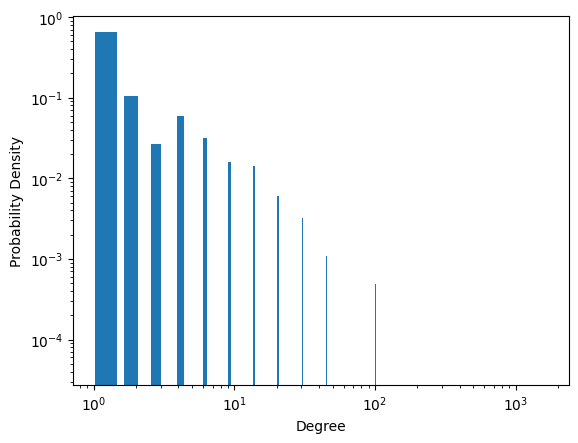

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Convert dictionary keys to array for data points
degrees_CSS = np.array(list(CSS_graph_dict.keys()))
freq = np.array(list(CSS_graph_dict.values()))

#degrees_CSS = degrees_CSS + 1e-6

bins = np.logspace(np.log10(1), np.log10(max(freq)), 20)

print(bins)
# Calculate histogram with logarithmic bins
hist, edges = np.histogram(freq, bins=bins, density=True)

# Calculate the centers of the bins
x = (edges[:-1] + edges[1:]) / 2

width = bins[1]-bins[0]
print(width)

#hist, bins = np.histogram(degrees, bins=np.arange(np.max(degrees) + 2), weights=frequencies)

xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])

#print(xx)
#print(yy)

# Plot the histogram
fig,ax = plt.subplots()
ax.bar(xx,yy,width=width*0.9)
#ax.plot(x,hist,marker=".")
ax.set_xlabel("Degree")
ax.set_ylabel("Probability Density")
ax.set_xscale('log')  # Set x-axis to log scale
ax.set_yscale('log')  # Set y-axis to log scale

# Plot histogram
#plt.hist(x, bins=bins, weights=hist, density=True, alpha=0.5, label='Histogram')
#plt.xlabel('Degree')
#plt.ylabel('Probability')
#plt.title('Degree Distribution')
#plt.xscale('log')  # Set x-axis to log scale
#plt.yscale('log')  # Set y-axis to log scale
#plt.legend()
#plt.show()